---
title: "Two sample t-test"
output: html_document
date: "2025-05-28"
---

```{r setup, include=FALSE}
knitr::opts_chunk$set(echo = TRUE, eval = F)
```

Let's compare the means of two samples using independent t-test (and paired t-test as
extra exercises).
 - Replace _ to complete expressions and return the correct answer  
 - Restart R to remove previous results using: Ctrl/Cmd + shift + F10
 - Remember - try to use Google to help you answer questions

## Import the packages

Import the `tidyverse` for `dplyr` and `ggplot2` packages

In [ ]:
library("tidyverse")

## Two-sample t-test

`River_pH.csv` contains pH measurements between two rivers. A researcher is interested 
if the mean pH is different between the two rivers.

### Import data

Import `river_ph.csv` from the `data/` folder



In [53]:
river_ph <- readr::read_csv(file = '../data/river_ph.csv')
river_ph_factor <- river_ph |> dplyr::mutate(River_name = factor(River_name))
summary(river_ph_factor)
river_ph |> count(River_name)

Rows: 20 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): River_name
dbl (1): pH

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


   River_name       pH       
 Elstone:10   Min.   :5.327  
 Fair   :10   1st Qu.:6.644  
              Median :7.466  
              Mean   :7.535  
              3rd Qu.:8.741  
              Max.   :9.937  

River_name,n
<chr>,<int>
Elstone,10
Fair,10


### Examine the dataset

- How many columns are there?\
***->Just 2 columns***
- How many values of River_name are there?\
***->2 values: 'Elstone' and 'Fair'***
- How many samples in each group?\
***->10 samples for each River***

### Visualise data

Visualise the data using a boxplot. Does there appear to be a difference in pH?

In [15]:
library("ggplot2")

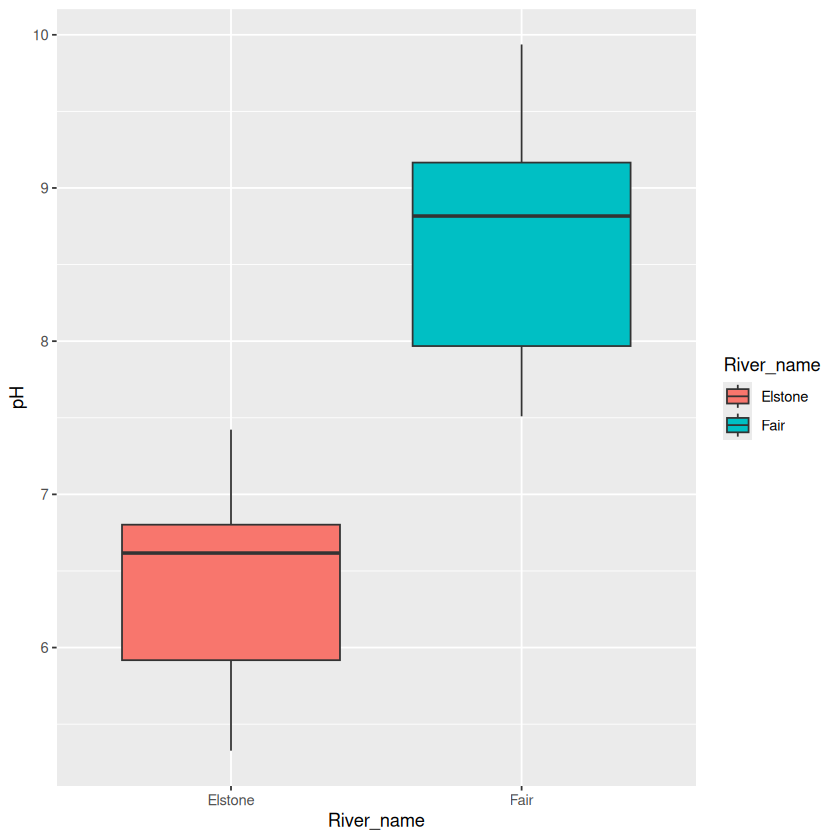

In [ ]:
river_ph |>
  ggplot(aes(x = River_name, y = pH, fill = River_name)) +
  geom_boxplot()

Update the axes labels, add a title, and export the plot as a png with dimensions 100 x 100 mm to the outputs folder.

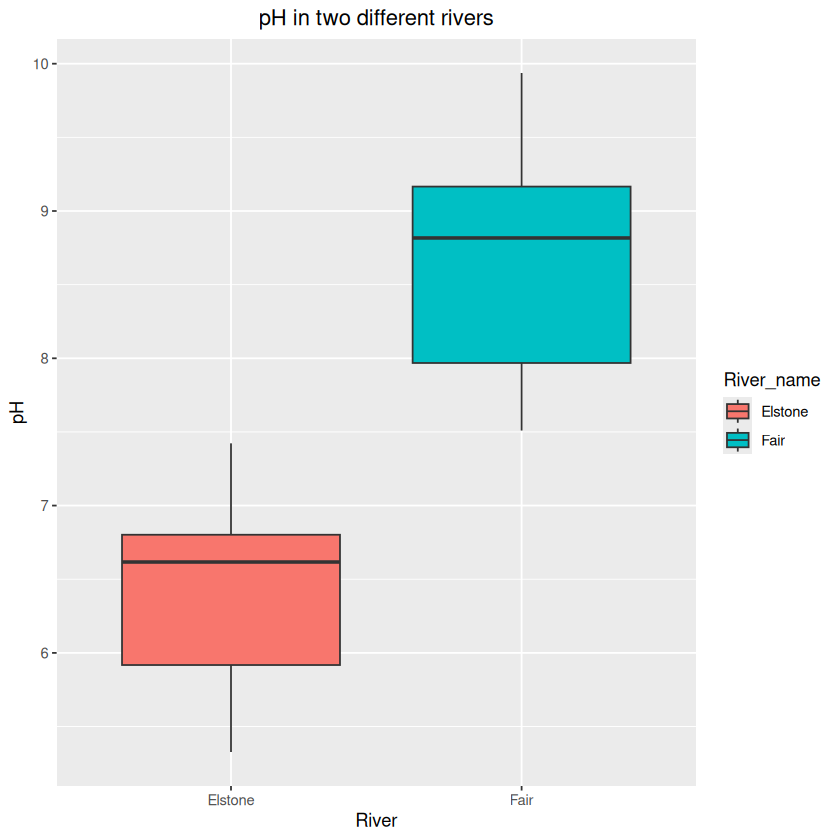

In [ ]:
river_ph |>
  ggplot(aes(x = River_name, y = pH, fill = River_name)) +
  geom_boxplot() +
  labs(x = "River", y = "pH", title = "pH in two different rivers") +
  theme(plot.title = element_text(hjust = 0.5))
ggsave(
  filename = '../outputs/river_ph_boxplot.png',
  plot = last_plot(),
  width = 100,
  height = 100,
  units = 'mm'
)

### Summarise 

Obtain a data summary including
 - the number of samples
 - mean
 - standard deviation (sd)
 - standard error ( sd / sqrt(n) )

In [40]:
library("dplyr")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [54]:
river_ph_data_summary <-
  river_ph |>
  group_by(River_name) |> 
  summarise(
    n_samples = n(),
    mean_pH = mean(pH),
    sd_pH = sd(pH),
    se_pH = sd_pH / sqrt(n_samples)
  )

river_ph_data_summary

River_name,n_samples,mean_pH,sd_pH,se_pH
<chr>,<int>,<dbl>,<dbl>,<dbl>
Elstone,10,6.408560,0.6266893,0.1981766
Fair,10,8.661497,0.8058678,0.2548378


### Conduct t-test

What is the null hypothesis here?\
***->That the pH average is the same across both rivers***

Conduct a t.test of pH between rivers.

 - Assume equal variances for traditional t-test (var.equal = T)
 - Remember to use a formula y ~ x

In [ ]:
t.test(formula = pH ~ River_name, data = river_ph, var.equal = T)


	Two Sample t-test

data:  pH by River_name
t = -6.9788, df = 18, p-value = 1.618e-06
alternative hypothesis: true difference in means between group Elstone and group Fair is not equal to 0
95 percent confidence interval:
 -2.931168 -1.574706
sample estimates:
mean in group Elstone    mean in group Fair 
             6.408560              8.661497 


***-> There is a significant difference between the pH mean of the two rivers, being greater in the river Fair than Elstone.***

---
## Additional exercises - Paired t-test

`madrid-weather-monthly-2010-2020.csv` contains daily temperature, humidity and precipitation every two years from 2010 to 2020.

A researcher wants to know if there is a difference in monthly temperature, on
average, between the year 2010 and the year 2020. We will pair the months from
each year and conduct a paired t-test.

### Import data

In [45]:
madrid_weather <-
  readr::read_csv(file = '../data/madrid-weather-monthly-2010-2020.csv')

Rows: 2193 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): year, month, day, Temperature_C, Humidity_pct, Precipitation_mm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Prepare data
- Filter the data for the years 2010 and 2020
- Summarise the daily data by year and month to obtain mean monthly Temperature_C

In [55]:
head(madrid_weather, n = 2)

year,month,day,Temperature_C,Humidity_pct,Precipitation_mm
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,1,1,5,85,1.2
2010,1,2,5,90,0.0


In [63]:
madrid_weather |>
filter(year == 2010 | year == 2020) |>
group_by(year, month) |>
summarise(
    n = n(),
    mean_monthly_temperature = mean(Temperature_C),
    .groups = 'drop'
)

year,month,n,mean_monthly_temperature
<dbl>,<dbl>,<int>,<dbl>
2010,1,31,4.870968
2010,2,28,5.857143
2010,3,31,8.774194
2010,4,30,14.900000
2010,5,31,17.645161
2010,6,30,23.433333
2010,7,31,31.387097
2010,8,31,29.451613
2010,9,30,23.100000


# Next you need to pivot the data so there are 2 columns of monthly data from 2010 and 2020


madrid_weather_monthly_2010_2020_wide <-
  madrid_weather_monthly_2010_2020 %>% 
  pivot_wider(names_from = _,
              values_from = _,
              names_prefix = 'year_')


### Plot the data

# There a different ways to do this. To save time, I've provided a two

#### Using a line graph

# - Plot monthly temperature as two coloured lines from each year
# - There should only be 2 values in the legend


madrid_weather_monthly_2010_2020 %>% 
  ggplot(aes(x = _, y = _, color = _)) +
  _

#### Boxplot of differences

# - Calculate the difference between 2020 and 2010
# - Then use a boxplot to plot the calculated difference

madrid_weather_monthly_2010_2020_wide %>% 
  mutate(temp_difference = _ - _) %>% 
  ggplot(aes(x = _)) +
  _ +
  scale_y_continuous(limits = c(-1,1),
                     breaks = NULL) +
  geom_vline(xintercept = 0, linetype = 'dashed') +
  labs(title = 'Monthly temperature difference between 2020 and 2010',
       x = 'Temperature')

# Export the plot if you wish


### Conduct a paired t-test

# What is the null hypothesis here?
_

# - Remember to provide the arguments x and y the columns of the data, and to
# - use the argument paired = TRUE
 

t.test(
  x = _,
  y = _,
  paired = _
)

# Write a short summary sentence


```



## Conclusion 

We examined

 - independent t-test
 - paired t-test
 - reviewed some data manipulation
 - reviewed some data visualisation
